### Import packages

In [65]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Loading

In [66]:
dir_name = os.path.dirname("/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/")
print(os.listdir(dir_name))
!find $dir_name -type d -print

['validation', 'train', 'vectorize.py']
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/cats
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/cats


In [67]:
train_dir = os.path.join(dir_name, "train")
val_dir = os.path.join(dir_name, "validation")

train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")
val_cats_dir = os.path.join(val_dir, "cats")
val_dogs_dir = os.path.join(val_dir, "dogs")
val_dogs_dir

'/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs'

### Understanding the data

In [68]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

num_train = num_cats_train + num_dogs_train
num_val = num_cats_val + num_dogs_val

In [69]:
print(f"Total number of train data: {num_train}")
print(f"Total number of validation data: {num_val}")
print("---" * 15)
print(f"Total number of dogs train data: {num_dogs_train}")
print(f"Total number of cats train data: {num_cats_train}")
print("---" * 15)
print(f"Total number of dogs validation data: {num_dogs_val}")
print(f"Total number of cats validation data: {num_cats_val}")

Total number of train data: 2000
Total number of validation data: 1000
---------------------------------------------
Total number of dogs train data: 1000
Total number of cats train data: 1000
---------------------------------------------
Total number of dogs validation data: 500
Total number of cats validation data: 500


### Setting model parameters

In [70]:
BATCH_SIZE = 100
IMG_SHAPE = 150

### Data Augmentation

In [71]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (12, 3))
    axes = axes.flatten()
    for image, ax in zip(images_arr, axes):
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

### Flipping the images horizontally

In [74]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE)
                                              )

Found 2000 images belonging to 2 classes.


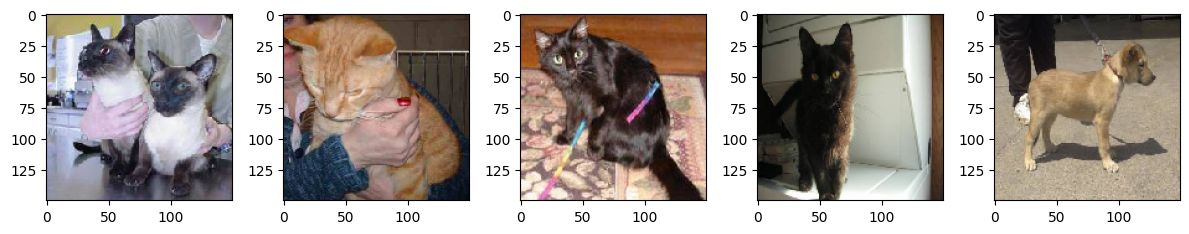

In [76]:
plot_images([train_data_gen[0][0][i] for i in range(5)])

### Rotating the image

In [89]:
image_gen =  ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE)
                                              )

Found 2000 images belonging to 2 classes.


In [95]:
sample_images = next(train_data_gen)
sample_images[0].shape

(100, 150, 150, 3)

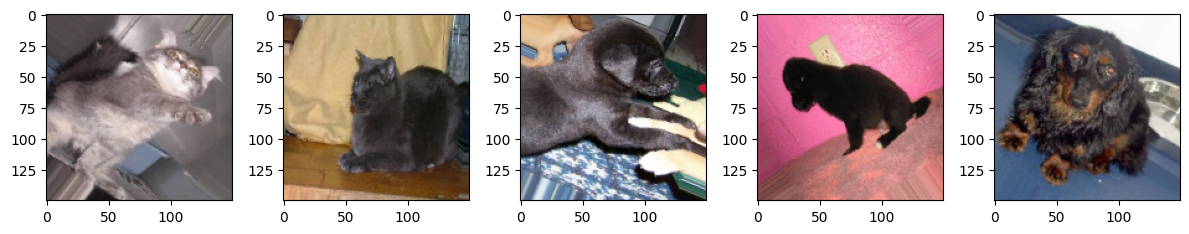

In [96]:
plot_images(sample_images[0][:5])

### Applying zoom

In [97]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE)
                                              )

Found 2000 images belonging to 2 classes.


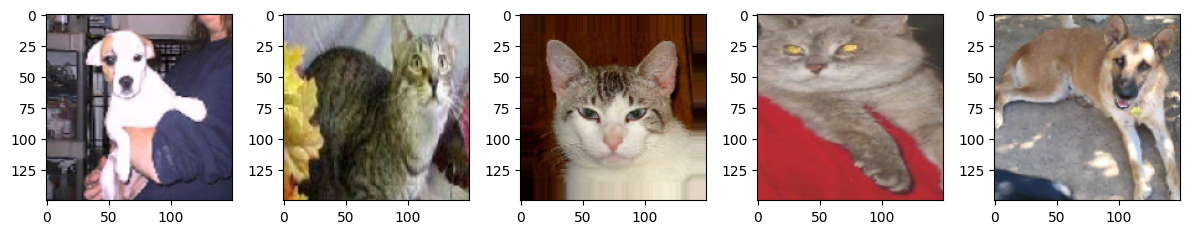

In [105]:
plot_images(train_data_gen[0][0][i] for i in range(5))

### Putting it all together

In [124]:
train_image_gen = ImageDataGenerator(rescale = 1./255,
                              horizontal_flip = True,
                              zoom_range = 0.5,
                              rotation_range = 45,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              fill_mode='nearest'
                              )

train_data_gen = train_image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                              directory = train_dir,
                              shuffle = True,
                              target_size = (IMG_SHAPE, IMG_SHAPE),
                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [125]:
sample_images = next(train_data_gen)
sample_images[0][95:].shape

(5, 150, 150, 3)

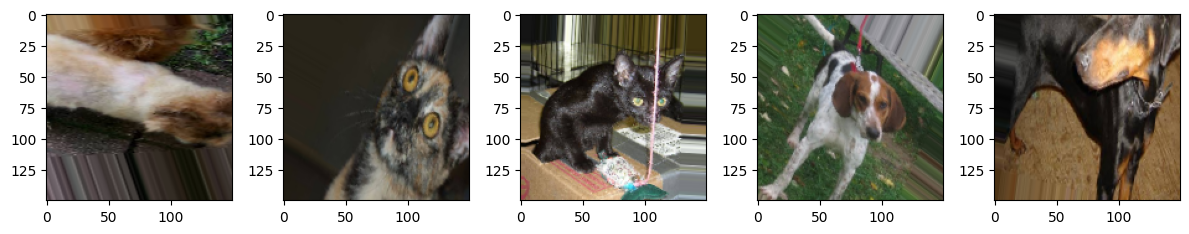

In [126]:
plot_images(sample_images[0][95:])

### Creating validation data generator

In [128]:
val_image_generator = ImageDataGenerator(rescale = 1./255)

val_data_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                      directory = val_dir,
                                                      target_size = (IMG_SHAPE, IMG_SHAPE),
                                                      class_mode = 'binary')

Found 1000 images belonging to 2 classes.


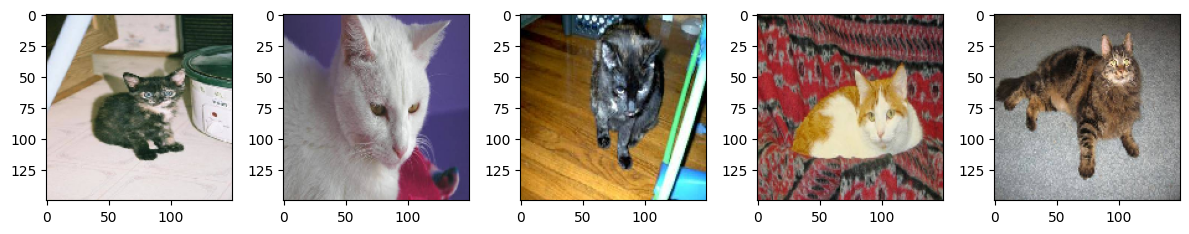

In [130]:
plot_images([val_data_gen[0][0][i] for i in range(5)])

### Model Creation

#### Define the model

In [133]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

### Compile the model

In [135]:
model.compile(loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy',
             optimizer = 'adam')

### Model summary

In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)       0

### Train the model

In [ ]:
EPOCHS = 10
history = model.fit_generator(train_data_gen,
                             steps_per_epoch = int(np.ceil(num_train/float(BATCH_SIZE))),
                             epochs = EPOCHS,
                             validation_data = val_data_gen,
                             validation_steps = int(np.ceil(num_val/float(BATCH_SIZE))))

/tmp/ipykernel_8989/2518381179.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,
2024-02-22 22:47:35.983228: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27000000 exceeds 10% of free system memory.


Epoch 1/10


2024-02-22 22:47:41.194773: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27000000 exceeds 10% of free system memory.
2024-02-22 22:47:41.235530: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 280371200 exceeds 10% of free system memory.
2024-02-22 22:47:42.423222: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70092800 exceeds 10% of free system memory.
2024-02-22 22:47:42.494247: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132710400 exceeds 10% of free system memory.


20/20 [==============================] - 121s 6s/step - loss: 0.7045 - accuracy: 0.4955 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 101s 5s/step - loss: 0.6953 - accuracy: 0.5110 - val_loss: 0.6928 - val_accuracy: 0.5450
Epoch 3/10
20/20 [==============================] - 114s 5s/step - loss: 0.6924 - accuracy: 0.5385 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 112s 5s/step - loss: 0.6920 - accuracy: 0.5065 - val_loss: 0.6880 - val_accuracy: 0.5010
Epoch 5/10
20/20 [==============================] - 109s 5s/step - loss: 0.6787 - accuracy: 0.5645 - val_loss: 0.6636 - val_accuracy: 0.5810
Epoch 6/10
20/20 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.5510

### Visualizing results of training

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label = 'Train loss')
plt.plot(val_loss, label = "Validation loss")
plt.title("Train and validation Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracy, )